## Sports Celebrity Image Classification: Data Cleaning

In [18]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
img = cv2.imread('./dataset/messi.jpg')
img.shape

(450, 360, 3)

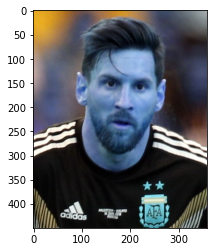

In [20]:
plt.imshow(img)

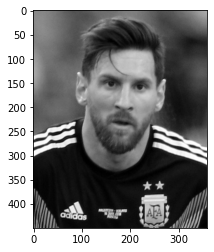

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#### Lets detect face and eyes from the image and crop them.
We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [22]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[100,  83, 185, 185]])

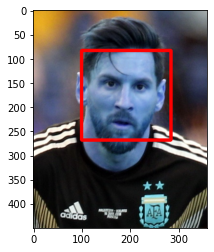

In [23]:
(x,y,w,h) = faces[0] # there might be couple of faces ditected...we get the first
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
plt.imshow(face_img)

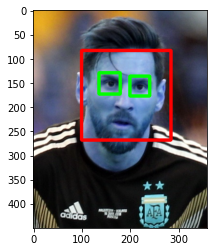

In [24]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

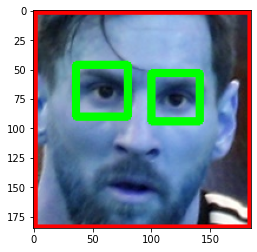

In [25]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [88]:
# This function detect both eyes before cropping
import matplotlib.image

def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
    except:
        img = matplotlib.image.imread(image_path)
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

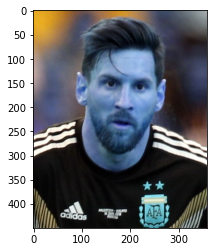

In [89]:
original_image = cv2.imread('./dataset/messi.jpg')
plt.imshow(original_image)

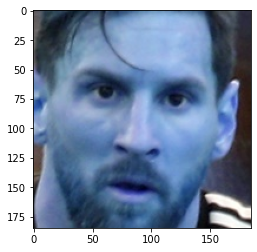

In [90]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/messi.jpg')
plt.imshow(cropped_image)

In [91]:
path_to_data = "C:/Users/banda/Documents/Celebrity Face Recognition/dataset"

In [92]:
# this removes the cropped images directory
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
        

In [93]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(str(entry.path))
        
img_dirs

['C:/Users/banda/Documents/Celebrity Face Recognition/dataset\\lionel messi',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset\\maria sharapova',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset\\roger federer',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset\\serena williams',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset\\virat kohli']

In [94]:
if not os.path.exists(path_to_data + "/cropped/"):
     os.mkdir(path_to_data + "/cropped/")

In [76]:
for img_dir in img_dirs:
    for entry in os.scandir(img_dir):
        img_type = entry.path.split('.')[-1]
        
        if img_type == "html":
            os.remove(entry)
            print("removed " + entry.path.split('\')[-1])

removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (1).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (2).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (3).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (4).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (5).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (6).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer (7).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer Tennis - Home _ Facebook (1).html
removed C:/Users/banda/Documents/Celebrity Face Recognition/dataset\roger federer\Roger Federer Tennis - Home _ Facebook.html
removed C

Lets itterate through the image database and crop all. Some of the images will have multiple faces detected. Since we take only the first face in the array, some of the cropped images might not be the correct person. So we have to manually examine cropped folder and delete any unwanted images.

In [95]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir): 
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:
            print(entry.path.split('\\')[-1]) # some file names have unrecognized characters and some files are .png type
            
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating cropped images for {celebrity_name}: \n")
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

lionel messi
Generating cropped images for lionel messi: 

Barcelona focus on Lionel....gif
Copa América Final_ Lionel Messi Tries....jpg
Leo Messi 🔟 (_WeAreMessi) _ Twitter (1).jpg
Leo Messi 🔟 (_WeAreMessi) _ Twitter.jpg
Lionel Messi losing €100_000 per day....jpg
Lionel Messi sur son arrivée au PSG....jpg
Lionel Messi Videos _ Barça TV_.png
Lionel Messi – talkSPORT.jpg
Lionel Messi €30m loyalty bonus....jpg
Messi et Paredes en sélection avec l....jpg
Messi isolated at PSG – Henry....jpg
Messi–Ronaldo rivalry - Wikipedia.jpg
PSG – Malaise_ Pochettino gets knocked....jpeg
maria sharapova
Generating cropped images for maria sharapova: 

Exclusive_ “Tennis—I_m Saying Goodbye....jpg
Maria Sharapova Dimensions & Drawings....svg
Maria Sharapova Its In The Heart GIF....gif
Maria Sharapova January 2021 — DORÉ EDIT.png
Maria Sharapova Quote_ “I_m done....jpg
Maria Sharapova – Family_ Family Tree....jpg
Maria Sharapova – Stock Editorial Photo....jpg
Maria Sharapova • Height_ Weight_ Size....jpg